<a href="https://colab.research.google.com/github/hmalpr01/Finance/blob/main/Predicci%C3%B3n_de_Tendencia_de_Precios_(Clasificaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de clasificación para predecir el alza del precio de un activo

##Importamos las librerias

In [ ]:
#!pip install ta-lib

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib

##Se selecciona la acción y extraemos la información

In [32]:
ticker = "TSLA"
df = yf.download(ticker, start="2020-01-01", end="2025-12-01",auto_adjust=False) #5 años
df.columns=df.columns.droplevel(1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


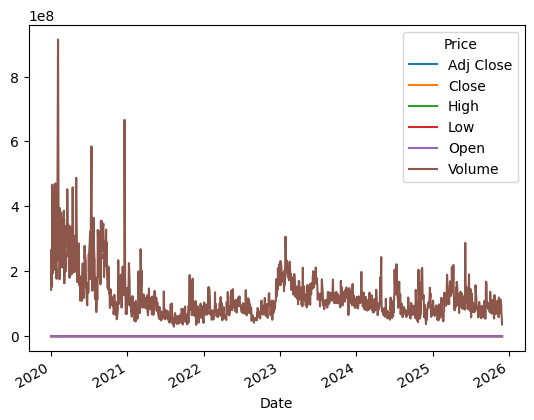

In [33]:
df.plot()
plt.show()

#Características

### Media Móvil Simple (Simple Moving Average, SMA)


In [34]:
df["sma_10"] = talib.SMA(df["Adj Close"], timeperiod=10)
df["sma_50"] = talib.SMA(df["Adj Close"], timeperiod=50)

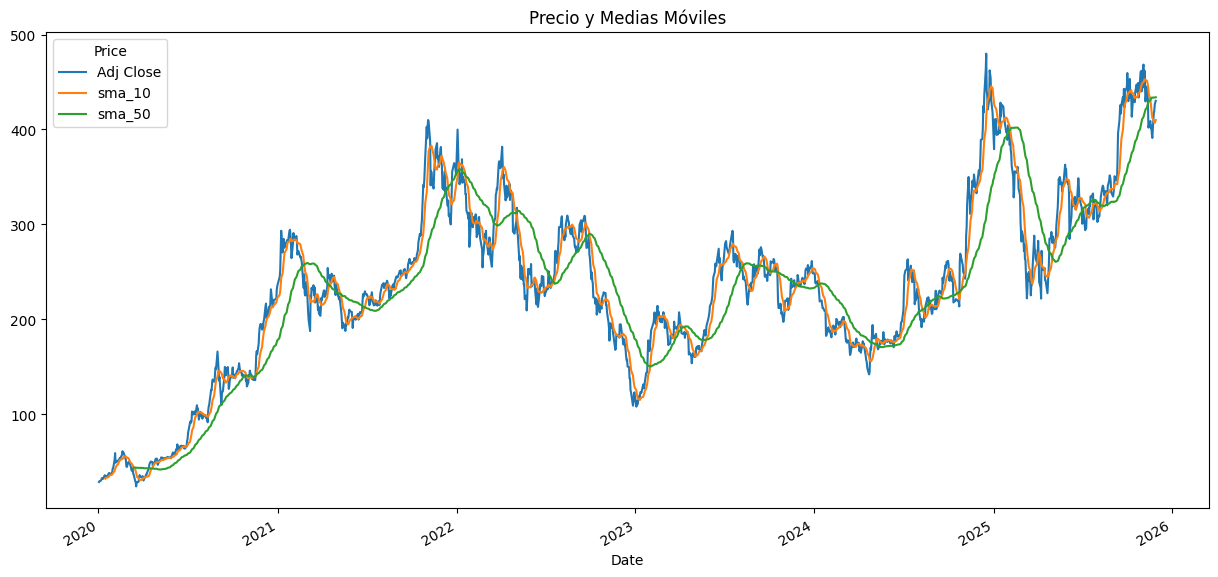

In [35]:
df[["Adj Close","sma_10","sma_50"]].plot(figsize = (15, 7), title="Precio y Medias Móviles")
plt.show()

### Relative Strength Index (RSI)


In [36]:
df["rsi"] = talib.RSI(df["Adj Close"], timeperiod=14)

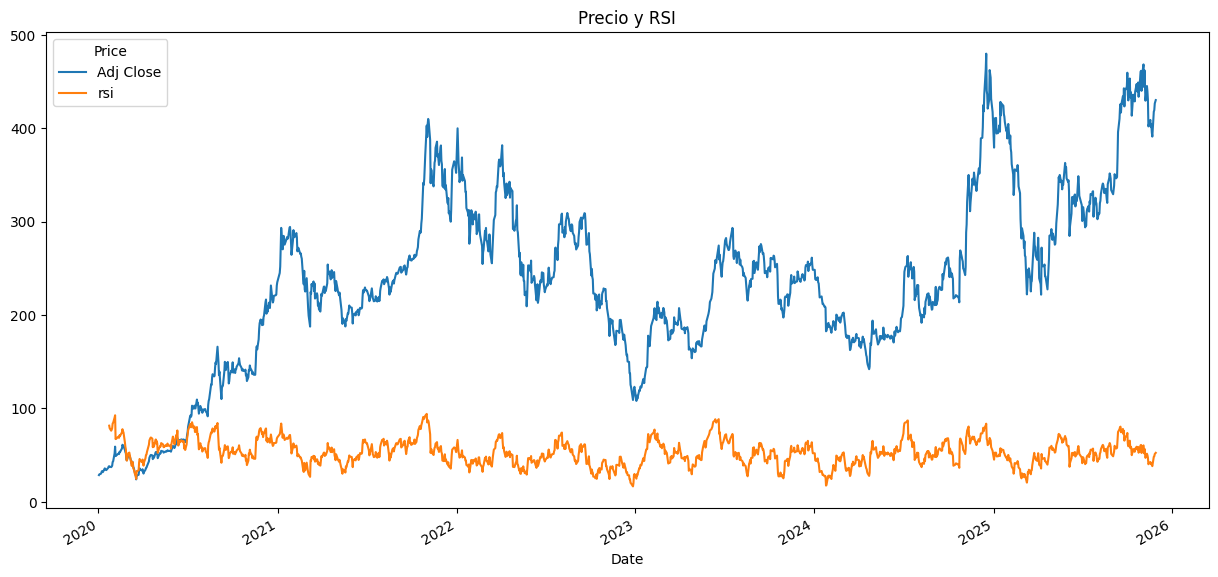

In [37]:
df[['Adj Close','rsi']].plot(figsize = (15, 7), title="Precio y RSI")
plt.show()

### Media Móvil Exponencial (Exponential Moving Average, EMA)

In [38]:
df['EMA_014d'] = talib.EMA(df['Adj Close'].values, timeperiod=14)
df['EMA_028d'] = talib.EMA(df['Adj Close'].values, timeperiod=28)
df['EMA_112d'] = talib.EMA(df['Adj Close'].values, timeperiod=112)

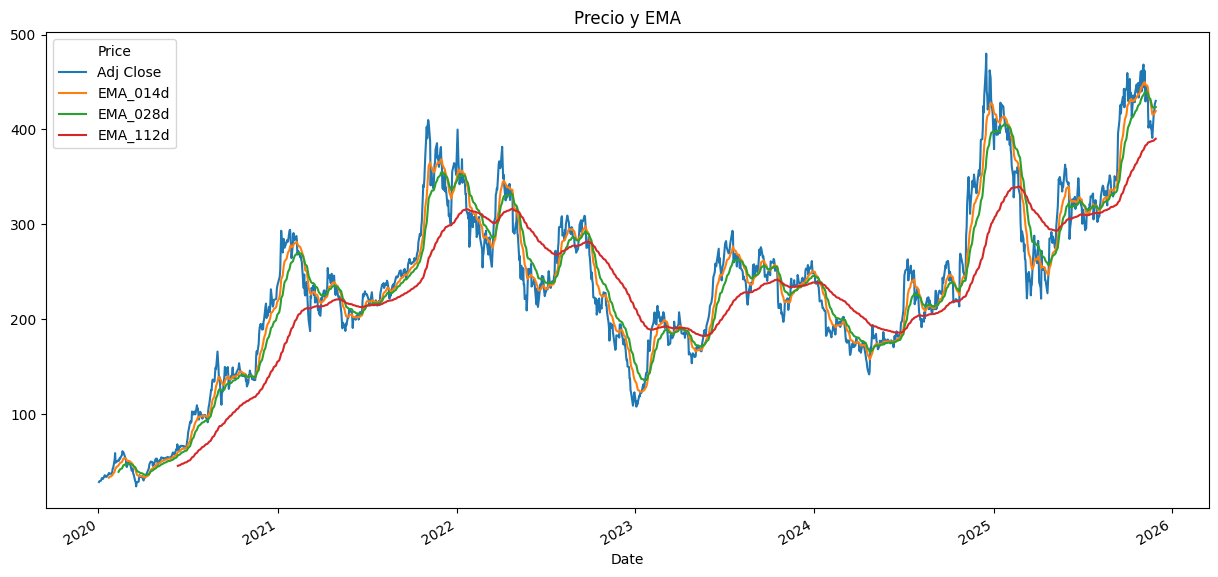

In [39]:
df[['Adj Close','EMA_014d','EMA_028d','EMA_112d']].plot(figsize = (15, 7), title="Precio y EMA")
plt.show()

##Otros indicadores técnicos

In [40]:
df["macd"], df["macd_signal"], _ = talib.MACD(df["Adj Close"])
df["adx"] = talib.ADX(df["High"], df["Low"], df["Adj Close"], timeperiod=14)
df["atr"] = talib.ATR(df["High"], df["Low"], df["Adj Close"], timeperiod=14)


In [41]:
df["aroon_up"], df["aroon_down"] = talib.AROON(df["High"], df["Low"], timeperiod=14)
df["aroon_osc"] = talib.AROONOSC(df["High"], df["Low"], timeperiod=14)

In [42]:
df["cmo"]   = talib.CMO(df["Adj Close"], timeperiod=14)
df["mom"]   = talib.MOM(df["Adj Close"], timeperiod=10)
df["roc"]   = talib.ROC(df["Adj Close"], timeperiod=10)
df["willr"] = talib.WILLR(df["High"], df["Low"], df["Close"], timeperiod=14)
df["natr"] = talib.NATR(df["High"], df["Low"], df["Close"], timeperiod=14)
df["roll_std_20"]  = df["Adj Close"].pct_change().rolling(20).std()
df["roll_kurt_20"] = df["Adj Close"].pct_change().rolling(20).kurt()
df["obv"]    = talib.OBV(df["Adj Close"], df["Volume"])
df["ad"]     = talib.AD(df["High"], df["Low"], df["Close"], df["Volume"])
df["adosc"]  = talib.ADOSC(df["High"], df["Low"], df["Close"], df["Volume"], fastperiod=3, slowperiod=10)
df["bb_upper"], df["bb_mid"], df["bb_lower"] = talib.BBANDS(df["Adj Close"], timeperiod=20)


df["sma_ratio"] = df["sma_10"] / df["sma_50"]
df["golden_cross"] = (df["sma_10"] > df["sma_50"]).astype(int)
df["death_cross"]  = (df["sma_10"] < df["sma_50"]).astype(int)

df["bb_width"] = (df["bb_upper"] - df["bb_lower"]) / df["bb_mid"]


In [43]:
df["return_1d"] = df["Adj Close"].pct_change().shift(-1)
df["target"] = (df["return_1d"] > 0).astype(int)

In [44]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,sma_10,sma_50,rsi,EMA_014d,...,adosc,bb_upper,bb_mid,bb_lower,sma_ratio,golden_cross,death_cross,bb_width,return_1d,target
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.029633,1
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.019255,1
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.038801,1
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.049205,1
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,-0.021945,0


In [45]:
features = ["rsi", "macd","macd_signal", "adx", "sma_10", "sma_50", "atr",'EMA_014d', 'EMA_028d', 'EMA_112d',"cmo","mom","roc","willr", "natr","roll_std_20", "roll_kurt_20","obv","ad","adosc","bb_upper","bb_width","aroon_up","aroon_osc","golden_cross","sma_ratio"]
df_model = df[features + ["target"]].dropna()

In [46]:
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty=None, solver='lbfgs',max_iter=100000,random_state=42,fit_intercept=True,class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=100000, penalty=None,
                   random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",max_depth=8,min_samples_leaf=0.03,random_state=42,class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=0.03, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=20,random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=20, random_state=42)

In [50]:
df_test_pred_lr = pd.DataFrame({'actual':y_test,'predicted': lr.predict(X_test),
                                'Non_Target':lr.predict_proba(X_test)[:,0],
                                'Target':lr.predict_proba(X_test)[:,1],
                               })


df_test_pred_dt = pd.DataFrame({'actual':y_test,'predicted': dt.predict(X_test),
                                'Non_Target':dt.predict_proba(X_test)[:,0],
                                'Target':dt.predict_proba(X_test)[:,1],
                               })


df_test_pred_rf = pd.DataFrame({'actual':y_test,'predicted': rf.predict(X_test),
                                'Non_Target':rf.predict_proba(X_test)[:,0],
                                'Target':rf.predict_proba(X_test)[:,1],
                               })

In [51]:
from sklearn import metrics
print("LR:",metrics.accuracy_score(df_test_pred_lr.actual,df_test_pred_lr.predicted))
print("DT:",metrics.accuracy_score(df_test_pred_dt.actual,df_test_pred_dt.predicted))
print("RF:",metrics.accuracy_score(df_test_pred_rf.actual,df_test_pred_rf.predicted))

LR: 0.45930232558139533
DT: 0.47093023255813954
RF: 0.4738372093023256


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

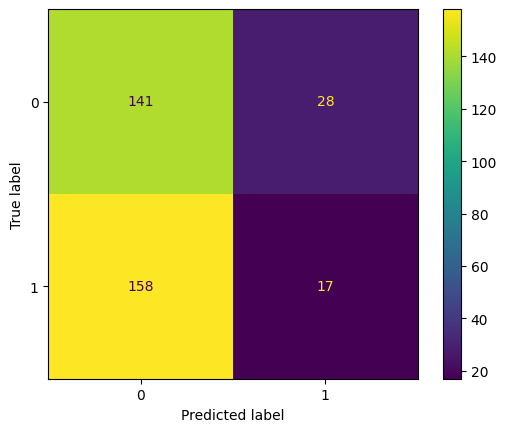

In [53]:
cm = confusion_matrix(df_test_pred_lr.actual,df_test_pred_lr.predicted, labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

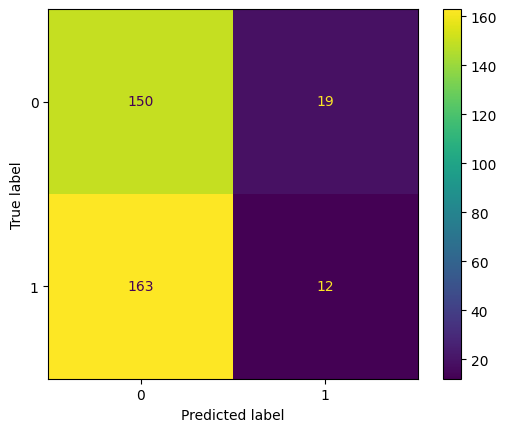

In [54]:
cm = confusion_matrix(df_test_pred_dt.actual,df_test_pred_dt.predicted, labels=dt.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()

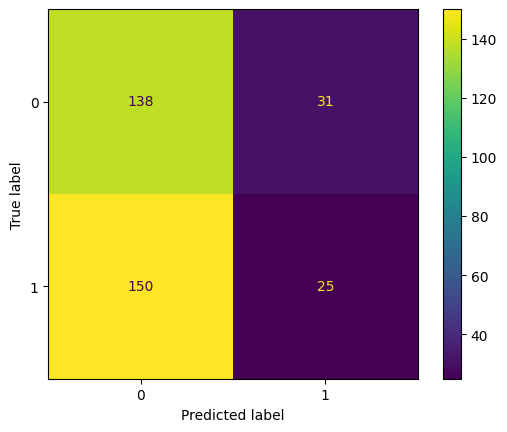

In [55]:
cm = confusion_matrix(df_test_pred_rf.actual,df_test_pred_rf.predicted, labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()